In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pc = pd.read_csv('pc.csv')
ps4 = pd.read_csv('ps4.csv')

In [4]:
print(pc.shape)
pc.head()

(1407, 9)


,platform,title,meta_score,user_score,num_critics,num_users,genres,developer,release_date
0,pc,DIVINITY: ORIGINAL SIN II,93.0,8.8,72.0,2171 Ratings,"['Action RPG', 'Role-Playing', 'Western-Style']",Larian Studios Games,14-Sep-17
1,pc,OKAMI HD,92.0,7.9,10.0,209 Ratings,"['Action Adventure', 'General']",Capcom,12-Dec-17
2,pc,BAYONETTA,90.0,8.1,17.0,541 Ratings,"['Action Adventure', 'Linear']","PlatinumGames, Nex Entertainment",11-Apr-17
3,pc,F1 2017,89.0,7.3,13.0,102 Ratings,"['Racing', 'Simulation', 'Automobile']",Codemasters,24-Aug-17
4,pc,LONE ECHO,89.0,7.9,14.0,77 Ratings,"['Action Adventure', 'General']",Ready at Dawn,20-Jul-17


In [5]:
print(ps4.shape)
ps4.head()

(1312, 9)


,platform,title,meta_score,user_score,num_critics,num_users,genres,developer,release_date
0,ps4,PERSONA 5,93,8.7,98,5184 Ratings,"['Role-Playing', 'Japanese-Style']",Atlus,4-Apr-17
1,ps4,UNDERTALE,92,7.1,18,845 Ratings,"['Role-Playing', 'Japanese-Style']","tobyfox, 8-4",15-Aug-17
2,ps4,FINAL FANTASY XIV: STORMBLOOD,89,8.6,15,331 Ratings,"['Role-Playing', 'Massively Multiplayer']",Square Enix,20-Jun-17
3,ps4,HORIZON ZERO DAWN,89,8.4,115,10589 Ratings,"['Role-Playing', 'Action RPG']",Guerrilla,28-Feb-17
4,ps4,WHAT REMAINS OF EDITH FINCH,88,8.3,65,749 Ratings,"['General', 'Adventure', '3D', 'First-Person']",Giant Sparrow,25-Apr-17


## Data Cleansing

In [6]:
# removing the string ' Ratings' from num_users column
pc.num_users = pc.num_users.str.strip(' Ratings')
ps4.num_users = ps4.num_users.str.strip(' Ratings')

In [7]:
# from genres column, removing ' "" [ ] characters
pc.genres = pc.genres.str.strip('[]')
pc.genres = pc.genres.str.replace("'","")
pc.genres = pc.genres.str.replace('"','')

ps4.genres = ps4.genres.str.strip('[]""')
ps4.genres = ps4.genres.str.replace("'","")
ps4.genres = ps4.genres.str.replace('"','')

In [8]:
# removing null values
pc.dropna(inplace=True)
ps4.dropna(inplace=True)

In [9]:
pc.dtypes

platform         object
title            object
meta_score      float64
user_score       object
num_critics     float64
num_users        object
genres           object
developer        object
release_date     object
dtype: object

In [10]:
ps4.dtypes

platform        object
title           object
meta_score       int64
user_score      object
num_critics      int64
num_users       object
genres          object
developer       object
release_date    object
dtype: object

In [11]:
# formatting the data types
pc.release_date = pd.to_datetime(pc.release_date)
pc.num_users = pc.num_users.astype(int)
pc.num_critics = pc.num_critics.astype(int)
pc.user_score = pc.user_score.astype(float)
pc.meta_score = pc.meta_score.astype(float)

ps4.release_date = pd.to_datetime(ps4.release_date)
ps4.num_users = ps4.num_users.astype(int)
ps4.num_critics = ps4.num_critics.astype(int)
ps4.user_score = ps4.user_score.astype(float)
ps4.meta_score = ps4.meta_score.astype(float)

In [12]:
pc.head()

,platform,title,meta_score,user_score,num_critics,num_users,genres,developer,release_date
0,pc,DIVINITY: ORIGINAL SIN II,93.0,8.8,72,2171,"Action RPG, Role-Playing, Western-Style",Larian Studios Games,2017-09-14
1,pc,OKAMI HD,92.0,7.9,10,209,"Action Adventure, General",Capcom,2017-12-12
2,pc,BAYONETTA,90.0,8.1,17,541,"Action Adventure, Linear","PlatinumGames, Nex Entertainment",2017-04-11
3,pc,F1 2017,89.0,7.3,13,102,"Racing, Simulation, Automobile",Codemasters,2017-08-24
4,pc,LONE ECHO,89.0,7.9,14,77,"Action Adventure, General",Ready at Dawn,2017-07-20


In [13]:
ps4.head()

,platform,title,meta_score,user_score,num_critics,num_users,genres,developer,release_date
0,ps4,PERSONA 5,93.0,8.7,98,5184,"Role-Playing, Japanese-Style",Atlus,2017-04-04
1,ps4,UNDERTALE,92.0,7.1,18,845,"Role-Playing, Japanese-Style","tobyfox, 8-4",2017-08-15
2,ps4,FINAL FANTASY XIV: STORMBLOOD,89.0,8.6,15,331,"Role-Playing, Massively Multiplayer",Square Enix,2017-06-20
3,ps4,HORIZON ZERO DAWN,89.0,8.4,115,10589,"Role-Playing, Action RPG",Guerrilla,2017-02-28
4,ps4,WHAT REMAINS OF EDITH FINCH,88.0,8.3,65,749,"General, Adventure, 3D, First-Person",Giant Sparrow,2017-04-25


### Creating a new dataset that contains games published on both platforms

In [14]:
# keeping only the games published on both platforms
pc_1 = pc[pc.title.isin(ps4.title)]
ps4_1 = ps4[ps4.title.isin(pc.title)]

In [15]:
# merging those two dfs
pc_ps4 = pd.concat([pc_1,ps4_1]).sort_values(by=['title','platform'], ascending=True).reset_index(drop=True)

In [16]:
pc_ps4.head()

,platform,title,meta_score,user_score,num_critics,num_users,genres,developer,release_date
0,pc,.HACK//G.U. LAST RECODE,69.0,8.1,7,27,"Miscellaneous, Compilation",CyberConnect2,2017-11-03
1,ps4,.HACK//G.U. LAST RECODE,76.0,8.1,21,68,"Miscellaneous, Compilation",CyberConnect2,2017-11-03
2,pc,11-11: MEMORIES RETOLD,73.0,6.7,11,29,"Adventure, General, 3D, Third-Person",Digixart Entertainment,2018-11-08
3,ps4,11-11: MEMORIES RETOLD,77.0,7.7,33,57,"Adventure, General, 3D, Third-Person",Digixart Entertainment,2018-11-09
4,pc,198X,63.0,5.5,13,21,"Action, Miscellaneous, Platformer, Party / Min...",Hi-Bit Studios,2019-06-20


In [17]:
# saving cleaned datasets
pc_ps4.to_csv('pc_ps4.csv', index=False)
pc.to_csv('pc_cleaned.csv', index=False)
ps4.to_csv('ps4_cleaned.csv', index=False)

## Exploratory Data Analysis

In [18]:
# seaborn settings
sns.set_style("white")
palette = sns.color_palette("crest",n_colors=10)
palette.reverse()

In [19]:
pc.head()

,platform,title,meta_score,user_score,num_critics,num_users,genres,developer,release_date
0,pc,DIVINITY: ORIGINAL SIN II,93.0,8.8,72,2171,"Action RPG, Role-Playing, Western-Style",Larian Studios Games,2017-09-14
1,pc,OKAMI HD,92.0,7.9,10,209,"Action Adventure, General",Capcom,2017-12-12
2,pc,BAYONETTA,90.0,8.1,17,541,"Action Adventure, Linear","PlatinumGames, Nex Entertainment",2017-04-11
3,pc,F1 2017,89.0,7.3,13,102,"Racing, Simulation, Automobile",Codemasters,2017-08-24
4,pc,LONE ECHO,89.0,7.9,14,77,"Action Adventure, General",Ready at Dawn,2017-07-20


In [31]:
ps4.head()

,platform,title,meta_score,user_score,num_critics,num_users,genres,developer,release_date
0,ps4,PERSONA 5,93.0,8.7,98,5184,"Role-Playing, Japanese-Style",Atlus,2017-04-04
1,ps4,UNDERTALE,92.0,7.1,18,845,"Role-Playing, Japanese-Style","tobyfox, 8-4",2017-08-15
2,ps4,FINAL FANTASY XIV: STORMBLOOD,89.0,8.6,15,331,"Role-Playing, Massively Multiplayer",Square Enix,2017-06-20
3,ps4,HORIZON ZERO DAWN,89.0,8.4,115,10589,"Role-Playing, Action RPG",Guerrilla,2017-02-28
4,ps4,WHAT REMAINS OF EDITH FINCH,88.0,8.3,65,749,"General, Adventure, 3D, First-Person",Giant Sparrow,2017-04-25


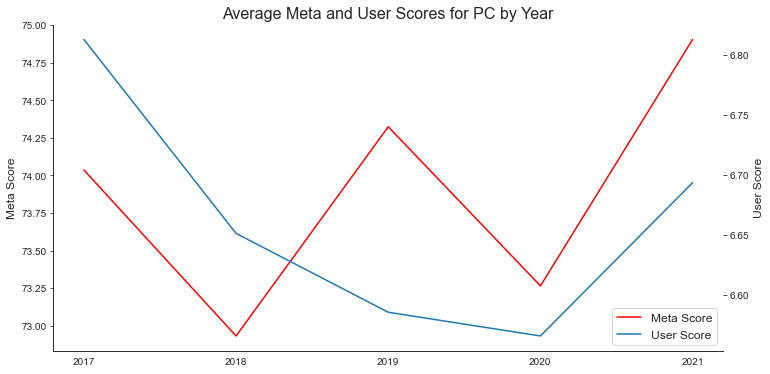

In [23]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=pc, x=pc.release_date.dt.strftime('%Y'), y='meta_score', err_style=None, color="r", label='Meta Score')
ax2 = ax.twinx()
sns.lineplot(data=pc, ax=ax2, x=pc.release_date.dt.strftime('%Y'), y='user_score', err_style=None, label='User Score')

ax.set_ylabel('Meta Score', fontsize=12)
ax2.set_ylabel('User Score', fontsize=12)

h1,l1 = ax.get_legend_handles_labels()
h2,l2 = ax2.get_legend_handles_labels()
ax.legend(loc=4, handles=h1+h2, labels = l1+l2, fontsize=12)
ax2.get_legend().remove()

ax.set_xlabel('')
plt.title('Average Meta and User Scores for PC by Year', fontsize=16)
sns.despine()
plt.show()

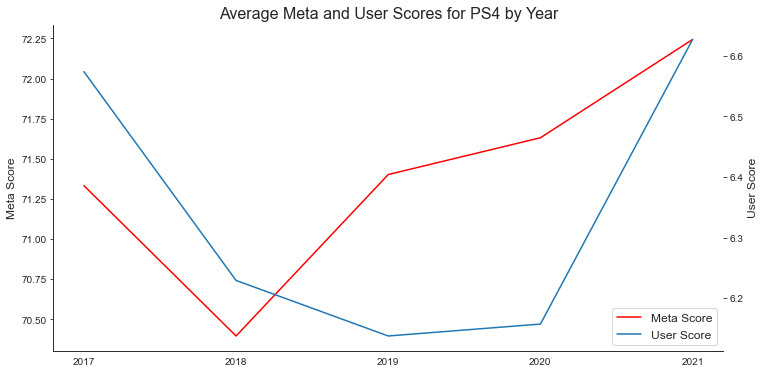

In [24]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=ps4, x=ps4.release_date.dt.strftime('%Y'), y='meta_score', err_style=None, color="r", label='Meta Score')
ax2 = ax.twinx()
sns.lineplot(data=ps4, ax=ax2, x=ps4.release_date.dt.strftime('%Y'), y='user_score', err_style=None, label='User Score')

ax.set_ylabel('Meta Score', fontsize=12)
ax2.set_ylabel('User Score', fontsize=12)

h1,l1 = ax.get_legend_handles_labels()
h2,l2 = ax2.get_legend_handles_labels()
ax.legend(loc=4, handles=h1+h2, labels = l1+l2, fontsize=12)
ax2.get_legend().remove()

ax.set_xlabel('')
plt.title('Average Meta and User Scores for PS4 by Year', fontsize=16)
sns.despine()
plt.show()

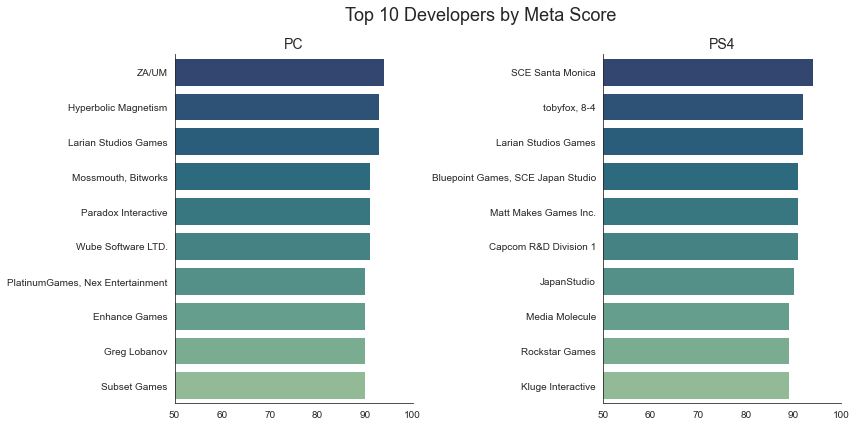

In [22]:
pc_developer_meta= pc.groupby('developer', as_index=False).meta_score.mean().sort_values(by='meta_score', ascending=False).head(10)
ps4_developer_meta= ps4.groupby('developer', as_index=False).meta_score.mean().sort_values(by='meta_score', ascending=False).head(10)

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12,6))
fig.suptitle('Top 10 Developers by Meta Score', fontsize=18, x=.56)

sns.barplot(x='meta_score', y='developer', data=pc_developer_meta, ax=ax[0], palette=palette)
sns.barplot(x='meta_score', y='developer', data=ps4_developer_meta, ax=ax[1], palette=palette)

ax[0].set(xlim=(50, 100)), ax[1].set(xlim=(50, 100))
ax[0].set_xlabel(''), ax[1].set_xlabel(''), ax[0].set_ylabel(''), ax[1].set_ylabel('')
ax[0].set_title('PC', fontsize=14), ax[1].set_title('PS4', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

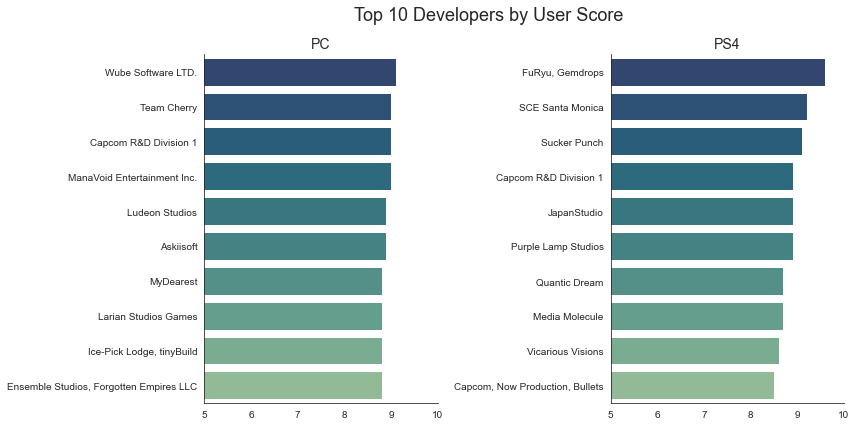

In [22]:
pc_developer_user= pc.groupby('developer', as_index=False).user_score.mean().sort_values(by='user_score', ascending=False).head(10)
ps4_developer_user= ps4.groupby('developer', as_index=False).user_score.mean().sort_values(by='user_score', ascending=False).head(10)

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12,6))
fig.suptitle('Top 10 Developers by User Score', fontsize=18, x=.57)

sns.barplot(x='user_score', y='developer', data=pc_developer_user, ax=ax[0], palette=palette)
sns.barplot(x='user_score', y='developer', data=ps4_developer_user, ax=ax[1], palette=palette)

ax[0].set(xlim=(5, 10)), ax[1].set(xlim=(5, 10))
ax[0].set_xlabel(''), ax[1].set_xlabel(''), ax[0].set_ylabel(''), ax[1].set_ylabel('')
ax[0].set_title('PC', fontsize=14), ax[1].set_title('PS4', fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

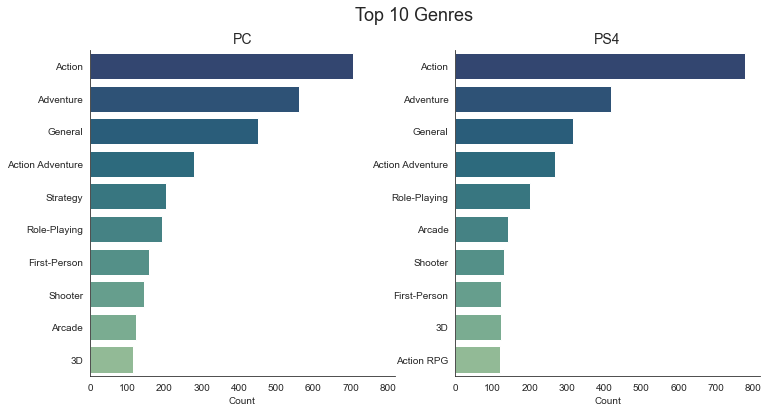

In [28]:
genres_pc = pc.genres.str.get_dummies(', ').columns.to_list()
genres_pc_count = [pc.genres.str.count(genre).sum() for genre in genres_pc]
genres_pc_df = pd.DataFrame({'genres':genres_pc, 'count':genres_pc_count})
top10_genres_pc = genres_pc_df.sort_values(by='count',ascending=False).head(10)

genres_ps4 = ps4.genres.str.get_dummies(', ').columns.to_list()
genres_ps4_count = [ps4.genres.str.count(genre).sum() for genre in genres_ps4]
genres_ps4_df = pd.DataFrame({'genres':genres_ps4, 'count':genres_ps4_count})
top10_genres_ps4 = genres_ps4_df.sort_values(by='count',ascending=False).head(10)

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12,6))
fig.suptitle('Top 10 Genres', fontsize=18)

sns.barplot(x='count', y='genres', data=top10_genres_pc, ax=ax[0], palette=palette)
sns.barplot(x='count', y='genres', data=top10_genres_ps4, ax=ax[1], palette=palette)

ax[0].set_xlabel('Count'), ax[1].set_xlabel('Count'), ax[0].set_ylabel(''), ax[1].set_ylabel('')
ax[0].set_title('PC', fontsize=14), ax[1].set_title('PS4', fontsize=14)

sns.despine()
plt.show()

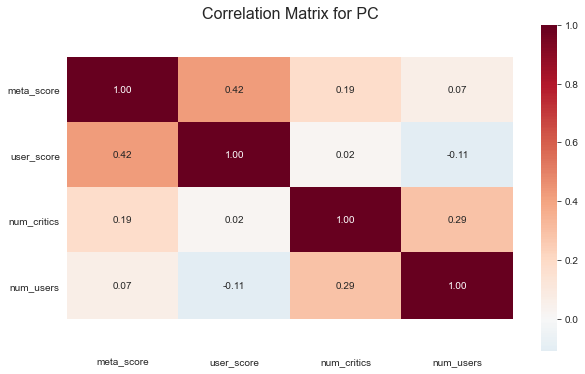

In [30]:
correlation = pc.corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(correlation, center=0, annot=True, cmap='RdBu_r', fmt='0.2f')
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix for PC', fontsize=16)
plt.show()

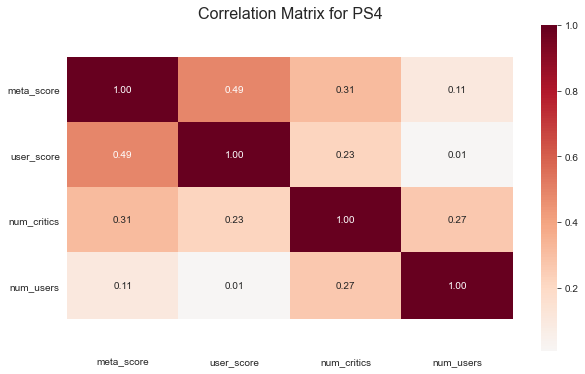

In [29]:
correlation = ps4.corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(correlation, center=0, annot=True, cmap='RdBu_r', fmt='0.2f')
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix for PS4', fontsize=16)
plt.show()

## Games Published on Both Platforms

In [25]:
pc_ps4.head()

,platform,title,meta_score,user_score,num_critics,num_users,genres,developer,release_date
0,pc,.HACK//G.U. LAST RECODE,69.0,8.1,7,27,"Miscellaneous, Compilation",CyberConnect2,2017-11-03
1,ps4,.HACK//G.U. LAST RECODE,76.0,8.1,21,68,"Miscellaneous, Compilation",CyberConnect2,2017-11-03
2,pc,11-11: MEMORIES RETOLD,73.0,6.7,11,29,"Adventure, General, 3D, Third-Person",Digixart Entertainment,2018-11-08
3,ps4,11-11: MEMORIES RETOLD,77.0,7.7,33,57,"Adventure, General, 3D, Third-Person",Digixart Entertainment,2018-11-09
4,pc,198X,63.0,5.5,13,21,"Action, Miscellaneous, Platformer, Party / Min...",Hi-Bit Studios,2019-06-20


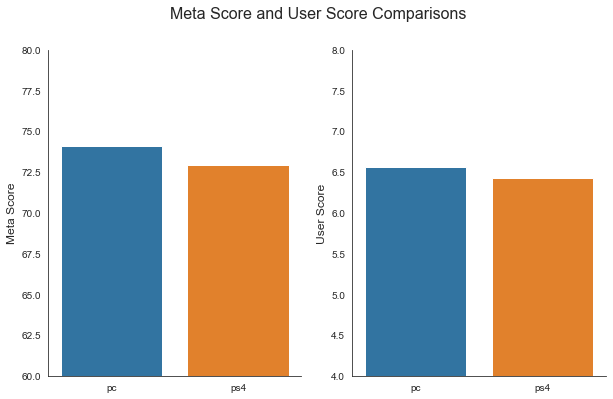

In [36]:
meta_score_mean = pc_ps4.groupby('platform', as_index=False).meta_score.mean()
user_score_mean = pc_ps4.groupby('platform', as_index=False).user_score.mean()

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,6))
fig.suptitle('Meta Score and User Score Comparisons', fontsize=16)
sns.barplot(ax =ax[0], x='platform', y='meta_score', data=meta_score_mean)
sns.barplot(ax = ax[1], x='platform', y='user_score', data=user_score_mean)

ax[0].set(ylim=(60, 80))
ax[1].set(ylim=(4, 8))
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('Meta Score', fontsize=12)
ax[1].set_ylabel('User Score', fontsize=12)
sns.despine()
plt.show()

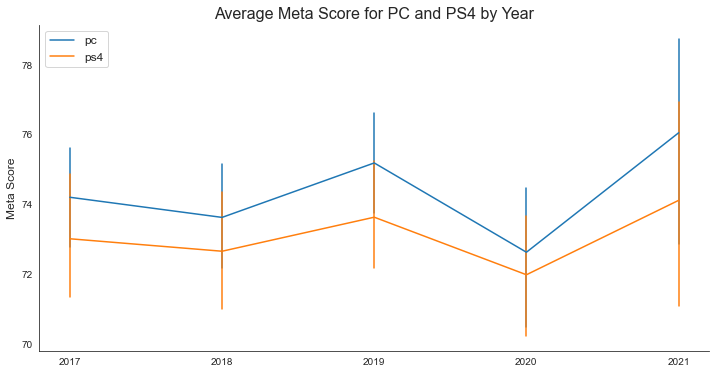

In [32]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=pc_ps4, x=pc_ps4.release_date.dt.strftime('%Y'), y='meta_score', hue='platform', err_style='bars')
plt.title('Average Meta Score for PC and PS4 by Year', fontsize=16)
plt.xlabel('')
plt.ylabel('Meta Score', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
sns.despine()

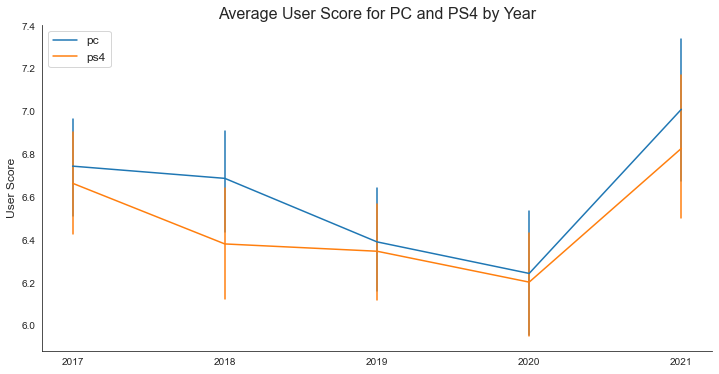

In [33]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=pc_ps4, x=pc_ps4.release_date.dt.strftime('%Y'), y='user_score', hue='platform', err_style='bars')
plt.title('Average User Score for PC and PS4 by Year', fontsize=16)
plt.xlabel('')
plt.ylabel('User Score', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
sns.despine()

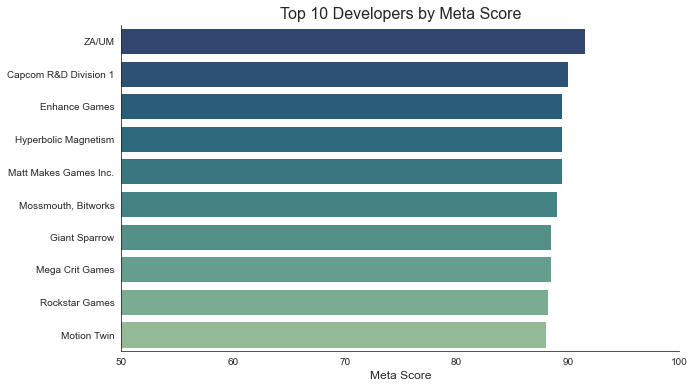

In [46]:
developer_meta= pc_ps4.groupby('developer', as_index=False).meta_score.mean().sort_values(by='meta_score', ascending=False).head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='meta_score', y='developer', data=developer_meta,  palette=palette)
ax.set(xlim=(50, 100))
plt.title('Top 10 Developers by Meta Score', fontsize=16)
plt.xlabel('Meta Score', fontsize=12)
plt.ylabel('')
sns.despine()
plt.show()

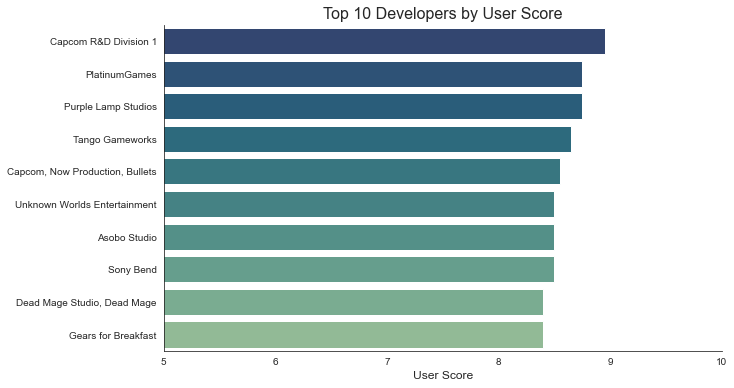

In [45]:
developer_user= pc_ps4.groupby('developer', as_index=False).user_score.mean().sort_values(by='user_score', ascending=False).head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='user_score', y='developer', data=developer_user,  palette=palette)
ax.set(xlim=(5, 10))
plt.title('Top 10 Developers by User Score', fontsize=16)
plt.xlabel('User Score', fontsize=12)
plt.ylabel('')
sns.despine()
plt.show()

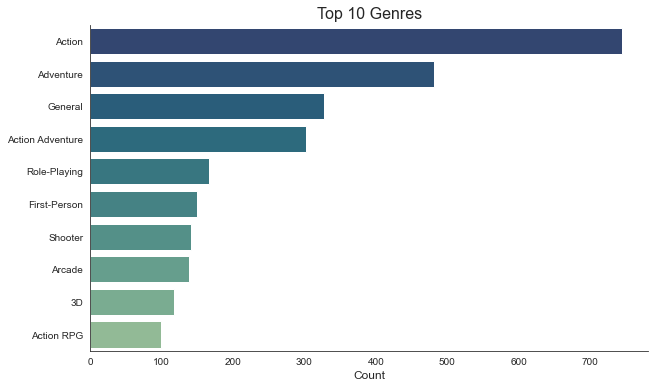

In [26]:
genres = pc_ps4.genres.str.get_dummies(', ').columns.to_list()
genres_count = [pc_ps4.genres.str.count(genre).sum() for genre in genres]
genres_df = pd.DataFrame({'genres':genres, 'count':genres_count})
top10_genres = genres_df.sort_values(by='count',ascending=False).head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='count', y='genres', data=top10_genres,  palette=palette)
plt.title('Top 10 Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')
sns.despine()
plt.show()

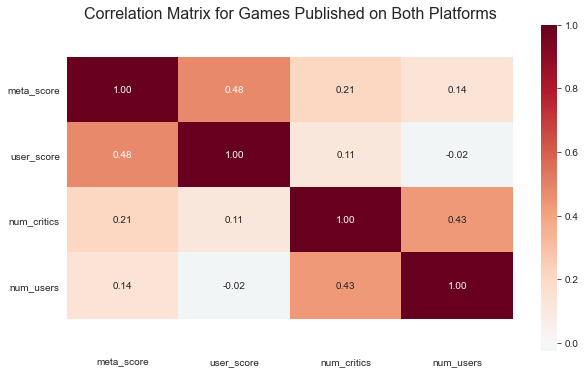

In [28]:
correlation = pc_ps4.corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(correlation, center=0, annot=True, cmap='RdBu_r', fmt='0.2f')
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix for Games Published on Both Platforms', fontsize=16)
plt.show()